In [1]:
import ee, datetime
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from matplotlib import dates
from pylab import *
from numpy import fft
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import MonthEnd
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
ee.Initialize()

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv("megacities.csv") 

collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2018-01-01', '2020-06-30')
point = {'type':'Point', 'coordinates':[-99.545934,20.572173]};
info = collection.getRegion(point,25000).getInfo()
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['tropospheric_NO2_column_number_density']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)


In [3]:
df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)

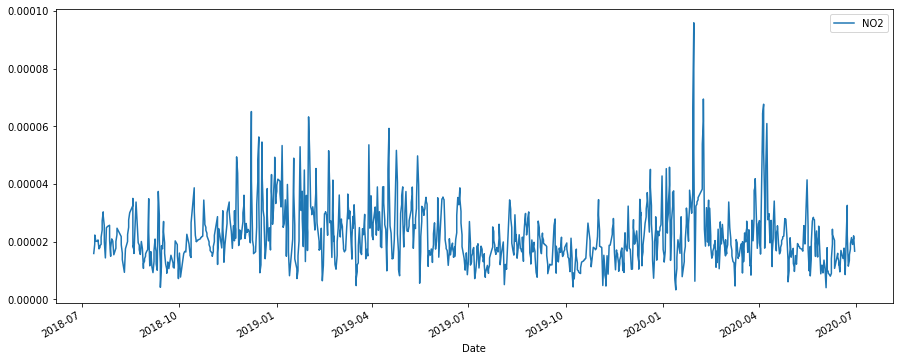

In [4]:
rcParams['figure.figsize'] = 15, 6
df.plot(y='NO2',x='Date')
plt.show()

In [5]:
mask19 = (df['Date'] > '2019-03-23') & (df['Date'] <= '2019-5-31')
print(df.loc[mask19].mean().values[0])
mask20 = (df['Date'] > '2020-03-23') & (df['Date'] <= '2020-5-31')
print(df.loc[mask20].mean().values[0])

2.635680170468416e-05
2.3151603727532863e-05


In [6]:
data_ = pd.read_csv("megacities.csv") 

In [7]:
data_['Latitude'].iloc[0]

12.9716

In [ ]:
diff_= []
std_ = []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['tropospheric_NO2_column_number_density']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    p_std = (df.loc[mask19].std().values[0]/mask19_)*100
    diff_.append(p_change)
    std_.append(p_std)
    print(data_['Name'].iloc[i_megc])

In [ ]:
diff_no2 = diff_

In [ ]:
data = {'NO2':np.asarray(diff_no2).flatten()} 
df_ = pd.DataFrame(data) 

In [ ]:
df_

In [ ]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_O3_TCL').select('ozone_tropospheric_vertical_column').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['ozone_tropospheric_vertical_column']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

In [ ]:
diff_o3 = diff_
df_

In [ ]:
df_['O3'] = np.asarray(diff_o3).flatten()
df_

In [ ]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('MODIS/006/MCD19A2_GRANULES').select('Optical_Depth_055').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['Optical_Depth_055']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

In [ ]:
diff_aod = diff_
df_

In [ ]:
df_['AOD'] = np.asarray(diff_aod).flatten()

In [ ]:
df_.to_csv("no2_o3_aod.csv")

In [8]:
diff_= []
# for i_megc in range(data_.shape[0]):
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('ECMWF/CAMS/NRT').select('particulate_matter_d_less_than_25_um_surface').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['particulate_matter_d_less_than_25_um_surface']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore


EEException: User memory limit exceeded.

In [9]:
len(diff_)

22

In [12]:
#diff_= []
# for i_megc in range(data_.shape[0]):
for i_megc in range(23,data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('ECMWF/CAMS/NRT').select('particulate_matter_d_less_than_25_um_surface').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['particulate_matter_d_less_than_25_um_surface']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

London
Los Angeles
Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria (Seychelles)
Saint Kitts and Nevis
Antigua and Barbuda


EEException: User memory limit exceeded.

In [ ]:
diff_pm25 = diff_

In [ ]:
df_['PM2.5'] = np.asarray(diff_pm25).flatten()

In [ ]:
#data_ = pd.read_csv("megacities.csv") 

In [ ]:
# df = data_.replace("nan", np.nan, regex=True)
# df['SO2'] = df['SO2'].astype(float)
# df['SO2'][df['SO2']>=100] = np.nan
# df['SO2'][df['SO2']<=-100] = np.nan

In [ ]:
import seaborn as sns, numpy as np
ax = sns.kdeplot(df['NO2'], label="NO2")
ax = sns.kdeplot(df['AOD'], label="AOD")
ax = sns.kdeplot(df['O3'], label="Tropospheric O3")
ax = sns.kdeplot(df['PM2.5'], label="PM2.5")
ax.legend()
ax.grid()

In [ ]:
#df_ = df[df['Population']>5]

In [ ]:
# import seaborn as sns, numpy as np
# ax = sns.kdeplot(df_['NO2'], label="NO2")
# ax = sns.kdeplot(df_['SO2'], label="SO2")
# ax = sns.kdeplot(df_['MODIS_NDVI'], label="NDVI")
# ax = sns.kdeplot(df_['MODIS_AOD'], label="AOD")
# ax = sns.kdeplot(df_['Tropospheric_O3'], label="Tropospheric O3")
# ax = sns.kdeplot(df_['CO'], label="CO")
# ax.legend()
# ax.grid()

In [ ]:
df__ = pd.DataFrame(columns=['val', 'species'])
for i in range(df['NO2'].shape[0]):
    df__.loc[i] = [df['NO2'].iloc[i], 'NO2']
for i in range(df['AOD'].shape[0],2*df['AOD'].shape[0]):
    df__.loc[i] = [df['AOD'].iloc[i-df['AOD'].shape[0]], 'AOD']
for i in range(2*df['O3'].shape[0],3*df['O3'].shape[0]):
    df__.loc[i] = [df['O3'].iloc[i-2*df['O3'].shape[0]], 'O3']
for i in range(3*df['PM2.5'].shape[0],4*df['PM2.5'].shape[0]):
    df__.loc[i] = [df['PM2.5'].iloc[i-3*df['PM2.5'].shape[0]], 'PM2.5']
df__['val']=df__['val'].astype('float64')
df__['val'][df__['val']>1000] = np.nan
df__['val'][df__['val']<-1000] = np.nan

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
ax = sns.violinplot(x="species", y="val", data=df__)
ax.grid()
ax.set_ylabel("% change during lockdown (2020) relative to 2019")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("megacities.png",dpi=500)

In [ ]:
dfp1 = df__[df__['population']>5]
#dfp1 = dfp1[dfp1['gdp']>5000]

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
ax = sns.violinplot(x="species", y="val", data=dfp1)
ax.grid()
ax.set_ylabel("% change during lockdown (2020) relative to 2019")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("megacities1.png",dpi=500)

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
cols = ["NO2", "SO2", "NDVI", "AOD", "Tropospheric_O3", "CO"]
for i in range(len(cols)):
    dist = df__[df__["species"]==cols[i]]
    dist = dist.dropna()
    #print(dist["val"])
    tset, pval = ttest_1samp(dist["val"], 0)
    print(cols[i], pval, dist["val"].mean())

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
cols = ["NO2", "SO2", "NDVI", "AOD", "Tropospheric_O3", "CO"]
for i in range(len(cols)):
    dist = dfp1[dfp1["species"]==cols[i]]
    dist = dist.dropna()
    #print(dist["val"])
    tset, pval = ttest_1samp(dist["val"], 0)
    print(cols[i],  pval, dist["val"].mean())